## O que pode ser explorado ?

1. tool wear failure (TWF)- Falha de desgaste da ferramenta
2. heat dissipation failure (HDF) - Falha na dissipação de calor
3. power failure (PWF)- Falha de energia
4. overstrain failure (OSF) - Falha por sobrecarga
5. random failures (RNF) - Falhas aleatórias

Descrição

1. a ferramenta será substituída ou falhará em um tempo de desgaste de ferramenta selecionado aleatoriamente entre 200 e 240 minutos (120 vezes em nosso conjunto de dados). Neste ponto no tempo, a ferramenta é substituída 69 vezes e falha 51 vezes (atribuídas aleatoriamente).

2. a dissipação de calor causa uma falha no processo se a diferença entre a temperatura do ar e a temperatura do processo for inferior a 8,6 K e a velocidade de rotação da ferramenta for inferior a 1380 rpm. Isso ocorre em 115 pontos de dados.

3. o produto do torque e da velocidade de rotação (em rad/s) é igual à potência requerida para o processo. Se essa potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falha, o que ocorre 95 vezes em nosso conjunto de dados.

4. se o produto do desgaste da ferramenta e do torque exceder 11.000 minNm para a variante de produto L (12.000 M, 13.000 H), o processo falha devido à sobrecarga. Isso é verdade para 98 pontos de dados.

5. cada processo tem uma chance de 0,1% de falhar independentemente de seus parâmetros de processo. Isso ocorre apenas em 5 pontos de dados, menos do que o esperado para 10.000 pontos de dados em nosso conjunto de dados.



In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib
import seaborn as sns

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/dados TCC/ai4i2020.csv")


## Dicionário de Dados

*   **UID**: identificador único variando de 1 a 10000

*   **ID do produto**: consiste em uma letra L, M ou H para baixa (50% de todos os
  produtos), média (30%) e alta (20%) como variantes de qualidade do produto e um número de série específico da variante

* **tipo**: apenas o tipo de produto L, M ou H da coluna 2

* **temperatura do ar [K]**: gerada usando um processo de caminhada aleatória
  posteriormente normalizado para um desvio padrão de 2 K em torno de 300 K

* **temperatura do processo [K]**: gerada usando um processo de caminhada aleatória
   normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.

* **velocidade de rotação [rpm]**: calculada a partir de uma potência de 2860 W,
  sobreposta a um ruído distribuído normalmente

* **torque [Nm]**: os valores de torque são distribuídos normalmente em torno de 40
  Nm com um desvio padrão de 10 Nm e sem valores negativos.

* **desgaste da ferramenta [min]**: As variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta usada no processo.



## Análise Geral

In [ ]:
dados.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Text(0, 0.5, 'N° de Amostras')

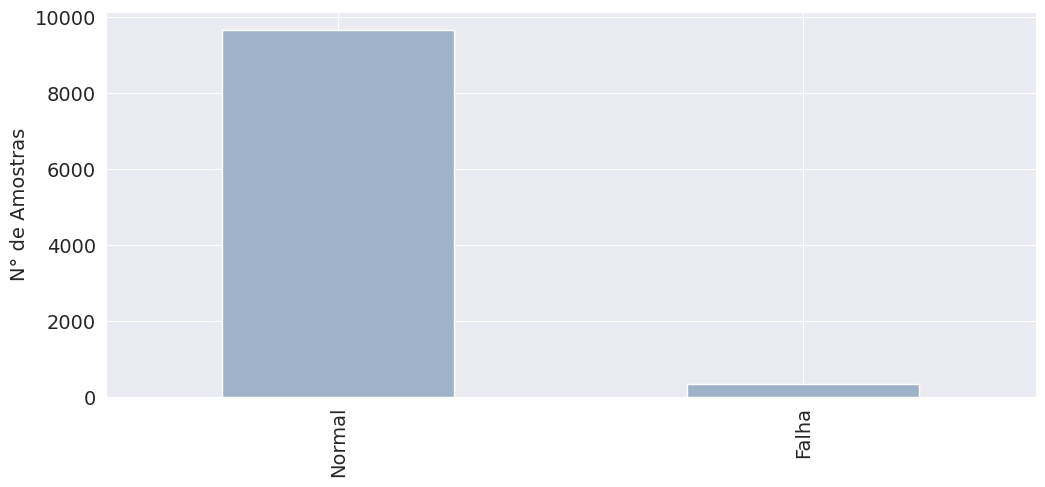

In [ ]:
gb = dados.groupby('Machine failure').size()
gb.index = ['Normal', 'Falha']
gb.plot(kind = 'bar', color= '#9FB3C8')
plt.ylabel('N° de Amostras')
#plt.xlabel('Condição de falha [bool]')
#plt.title('Distribuição de Amostras')

TWF     46
HDF    115
PWF     95
OSF     98
RNF      1
Name: 1, dtype: int64


Text(0, 0.5, 'N° de Amostras')

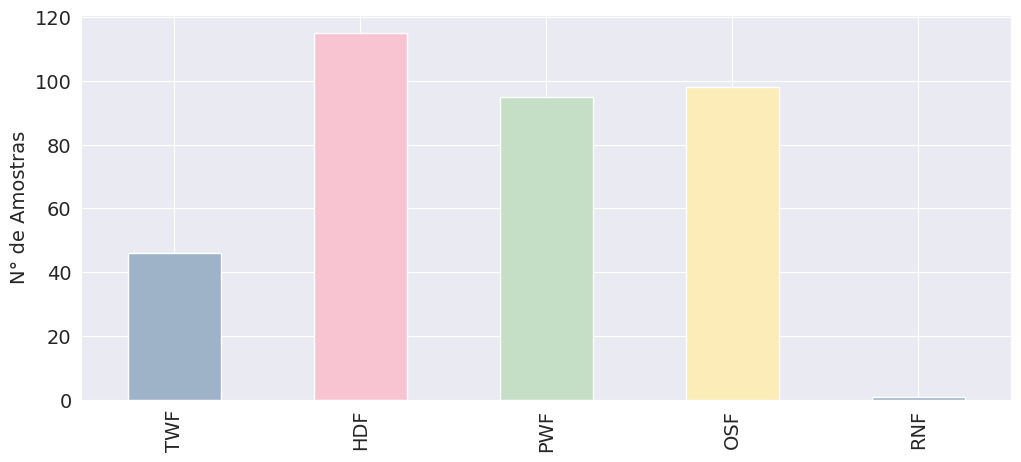

In [ ]:
gb = dados.groupby('Machine failure').sum()
gb[['TWF','HDF','PWF','OSF','RNF']].iloc[1].plot(kind = 'bar',color=['#9FB3C8', '#F9C4D2','#C4DFC5','#FCECB8'])
print(gb[['TWF','HDF','PWF','OSF','RNF']].iloc[1].head())
plt.ylabel('N° de Amostras')
#plt.xlabel('Tipo de falha')
#plt.title('Distribuição de Falhas')


##Correlação

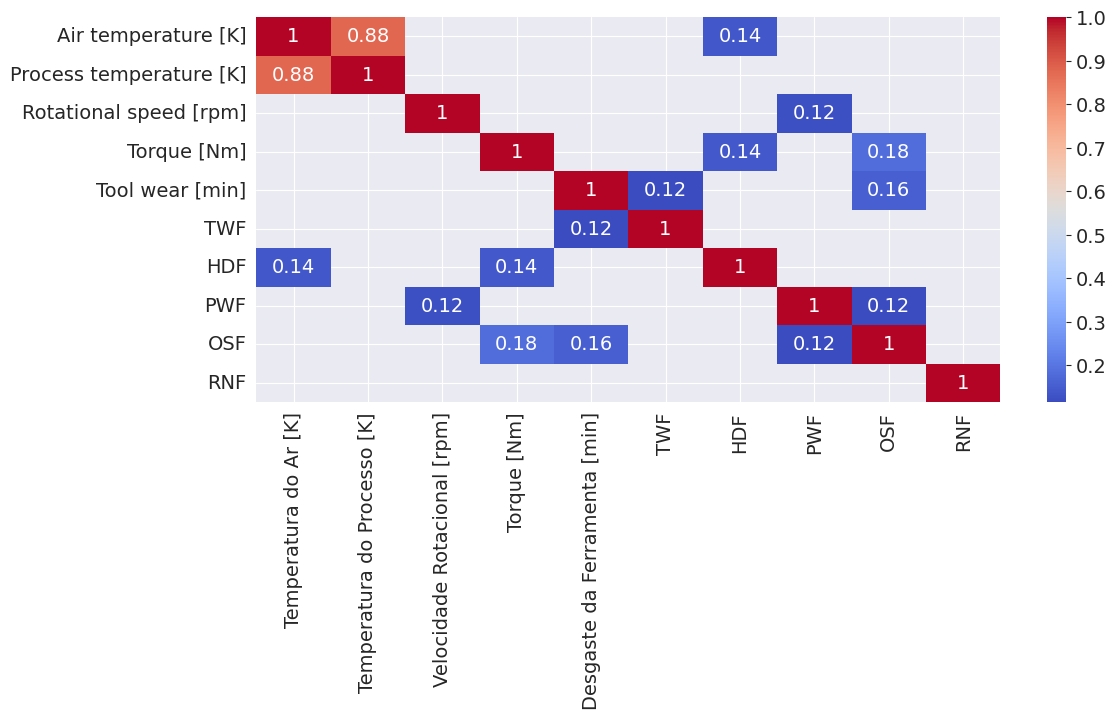

In [ ]:
# Calcula a matriz de correlação
correlation_matrix = dados[['Air temperature [K]',	'Process temperature [K]',	'Rotational speed [rpm]',
                            'Torque [Nm]'	,'Tool wear [min]'	,'TWF'	,'HDF'	,'PWF',	'OSF',	'RNF']].corr()

correlation_matrix.columns = ['Temperatura do Ar [K]',	'Temperatura do Processo [K]',	'Velocidade Rotacional [rpm]',
                           'Torque [Nm]'	,'Desgaste da Ferramenta [min]'	,'TWF'	,'HDF'	,'PWF',	'OSF',	'RNF']
# Filtra as correlações acima de 0.09
fil_correlation = correlation_matrix[correlation_matrix > 0.09]

# Cria um mapa de calor das correlações filtradas
sns.heatmap(fil_correlation, annot=True, cmap='coolwarm')

# Configurações adicionais
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

## Separando os datas sets por falha

In [ ]:
df_twf = dados[dados.TWF == 1].drop(['UDI','Machine failure','TWF','HDF', 'PWF', 'OSF','RNF','Product ID'], axis = 1).reset_index(drop=True)
df_twf.columns = ['Type(twf)'	,'Air temperature [K](twf)'	,'Process temperature [K](twf)',	'Rotational speed [rpm](twf)',	'Torque [Nm](twf)','Tool wear [min](twf)']

df_twf.head()
df_hdf = dados[dados.HDF == 1].drop(['UDI','Machine failure', 'HDF','TWF', 'PWF', 'OSF','RNF','Product ID'], axis = 1).reset_index(drop=True)
df_hdf.columns = ['Type(hdf)'	,'Air temperature [K](hdf)'	,'Process temperature [K](hdf)',	'Rotational speed [rpm](hdf)',	'Torque [Nm](hdf)','Tool wear [min](hdf)']

df_pwf = dados[dados.PWF == 1].drop(['UDI','Machine failure','PWF', 'HDF', 'TWF', 'OSF','RNF','Product ID'], axis = 1).reset_index(drop=True)
df_pwf.columns = ['Type(pwf)'	,'Air temperature [K](pwf)'	,'Process temperature [K](pwf)',	'Rotational speed [rpm](pwf)',	'Torque [Nm](pwf)','Tool wear [min](pwf)']

df_osf = dados[dados.OSF == 1].drop(['UDI','Machine failure', 'OSF','HDF', 'PWF', 'TWF','RNF','Product ID'], axis = 1).reset_index(drop=True)
df_osf.columns = [	'Type(osf)'	,'Air temperature [K](osf)'	,'Process temperature [K](osf)',	'Rotational speed [rpm](osf)',	'Torque [Nm](osf)','Tool wear [min](osf)']

df_normal = dados[dados['Machine failure'] == 0].drop(['UDI','Machine failure','TWF' ,'HDF', 'PWF', 'OSF','RNF','Product ID'], axis = 1).reset_index(drop=True)
df_normal.columns = [	'Type(normal)'	,'Air temperature [K](normal)'	,'Process temperature [K](normal)',	'Rotational speed [rpm](normal)',	'Torque [Nm](normal)'	,'Tool wear [min](normal)']

In [ ]:
df_osf.head()

,Type(osf),Air temperature [K](osf),Process temperature [K](osf),Rotational speed [rpm](osf),Torque [Nm](osf),Tool wear [min](osf)
0,L,298.9,309.0,1410,65.7,191
1,L,298.4,308.2,1282,60.7,216
2,L,298.3,308.1,1412,52.3,218
3,L,298.0,308.2,1348,58.8,202
4,L,298.0,308.3,1362,56.8,216


In [ ]:
df = pd.concat([df_twf, df_normal,df_osf,df_pwf,df_hdf], axis=1)
df.columns

Index(['Type(twf)', 'Air temperature [K](twf)', 'Process temperature [K](twf)',
       'Rotational speed [rpm](twf)', 'Torque [Nm](twf)',
       'Tool wear [min](twf)', 'Type(normal)', 'Air temperature [K](normal)',
       'Process temperature [K](normal)', 'Rotational speed [rpm](normal)',
       'Torque [Nm](normal)', 'Tool wear [min](normal)', 'Type(osf)',
       'Air temperature [K](osf)', 'Process temperature [K](osf)',
       'Rotational speed [rpm](osf)', 'Torque [Nm](osf)',
       'Tool wear [min](osf)', 'Type(pwf)', 'Air temperature [K](pwf)',
       'Process temperature [K](pwf)', 'Rotational speed [rpm](pwf)',
       'Torque [Nm](pwf)', 'Tool wear [min](pwf)', 'Type(hdf)',
       'Air temperature [K](hdf)', 'Process temperature [K](hdf)',
       'Rotational speed [rpm](hdf)', 'Torque [Nm](hdf)',
       'Tool wear [min](hdf)'],
      dtype='object')

## Análise do torque por falha

Text(0.5, 0, 'Torque [Nm]')

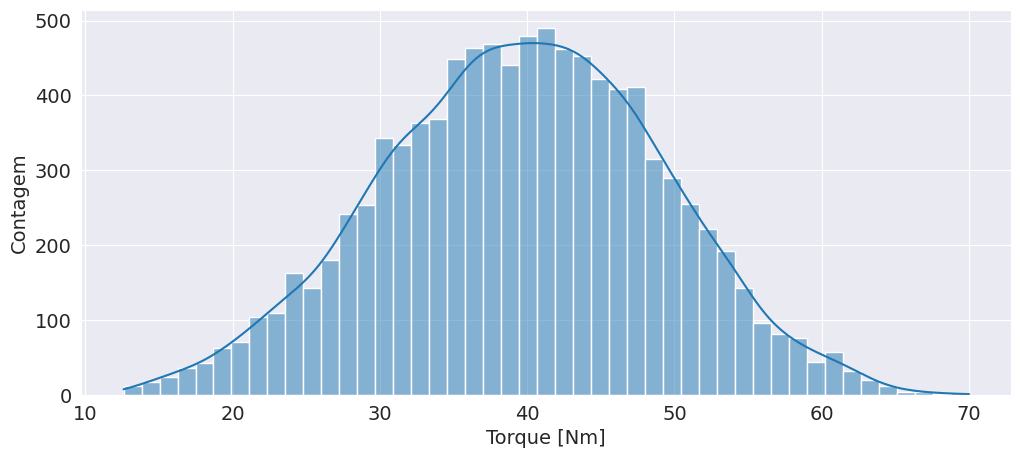

In [ ]:
# condição normal de funcionamento

sns.histplot(df['Torque [Nm](normal)'],kde=True)
plt.ylabel('Contagem')
plt.xlabel('Torque [Nm]')
#plt.title('Histograma do Torque para Classe Normal de Funcionamento')

In [ ]:
df_torque = df[['Torque [Nm](twf)','Torque [Nm](hdf)','Torque [Nm](pwf)','Torque [Nm](osf)']]
df_torque.columns = ['TWF','HDF','PWF','OSF']

Text(0.5, 1.0, 'Histograma do Torque para as Classes em Condição de Falha')

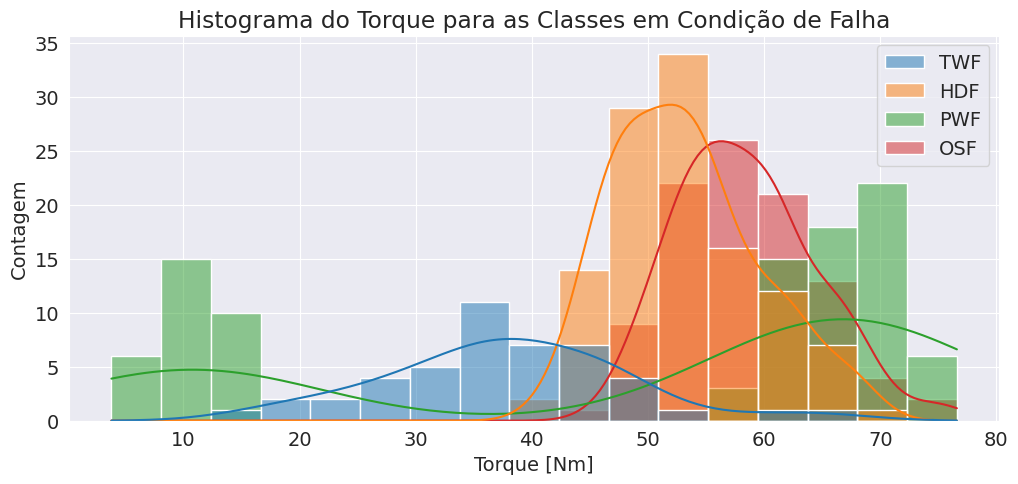

In [ ]:
sns.histplot(df_torque, kde=True)
plt.ylabel('Contagem')
plt.xlabel('Torque [Nm]')
plt.title('Histograma do Torque para as Classes em Condição de Falha')

In [ ]:
#sns.scatterplot(data=df[['Torque [Nm](twf)','Torque [Nm](hdf)','Torque [Nm](pwf)','Torque [Nm](osf)']])
#plt.xlabel('Quantidade de Amostras')
#plt.ylabel('Torque [Nm]')
#plt.title('Gráfico de dispersão para as Classes em Condição de Falha')

Text(0.5, 0, 'Torque [Nm]')

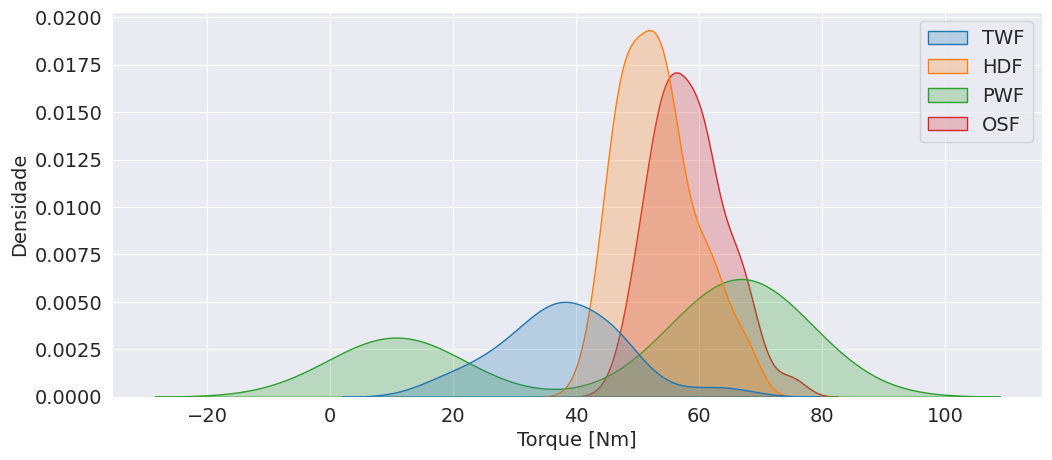

In [ ]:
sns.kdeplot(data = df_torque,fill=True)
plt.ylabel('Densidade')
plt.xlabel('Torque [Nm]')
#plt.title('Densidade da Distribuição das amostras do Torque para as Classes em Condição de Falha')

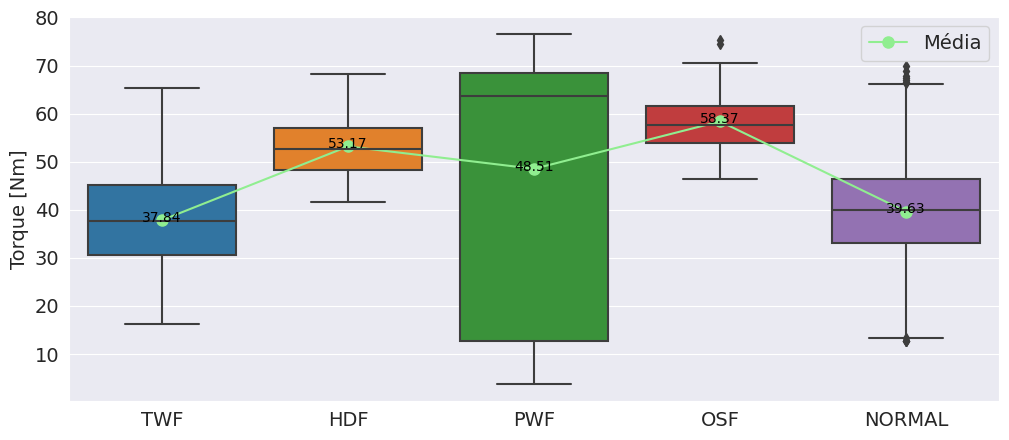

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas para o gráfico de boxplot
boxplot_data = df[['Torque [Nm](twf)', 'Torque [Nm](hdf)', 'Torque [Nm](pwf)', 'Torque [Nm](osf)','Torque [Nm](normal)']]
boxplot_data.columns = ['TWF','HDF','PWF','OSF','NORMAL']
# Calcular as médias das colunas
means = boxplot_data.mean()

# Criar o gráfico de boxplot
sns.boxplot(data=boxplot_data)

# Adicionar os pontos das médias
plt.plot(range(len(means)), means, marker='o', markersize=8, color='lightgreen', label='Média')

# Adicionar legenda com o valor da média
for i, mean in enumerate(means):
    plt.text(i, mean-1, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Adicionar legenda
plt.legend()
plt.ylabel('Torque [Nm]')
# Exibir o gráfico
plt.show()

##Air Temperature por falha

Text(0.5, 0, 'Temperatura [K]')

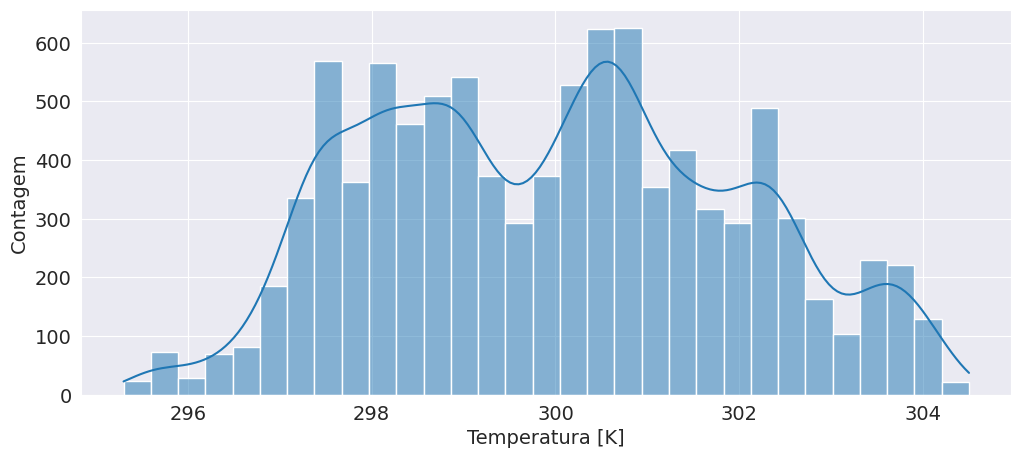

In [ ]:
# condição normal de funcionamento

sns.histplot(df['Air temperature [K](normal)'],kde=True)
plt.ylabel('Contagem')
plt.xlabel('Temperatura [K]')
#plt.title('Histograma da Temperatura do Ar para Classe Normal de Funcionamento')

In [ ]:
df_tempAr = df[['Air temperature [K](twf)','Air temperature [K](hdf)','Air temperature [K](pwf)','Air temperature [K](osf)']]
df_tempAr.columns = ['TWF','HDF','PWF','OSF']

Text(0.5, 1.0, 'Histograma da Temperatura do Ar para as Classes em Condição de Falha')

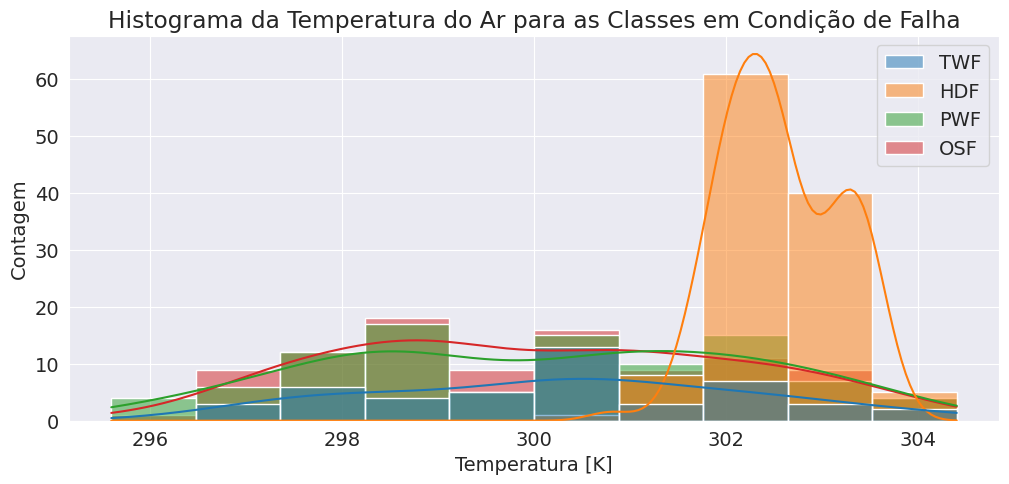

In [ ]:
sns.histplot(df_tempAr, kde=True)
plt.ylabel('Contagem')
plt.xlabel('Temperatura [K]')
plt.title('Histograma da Temperatura do Ar para as Classes em Condição de Falha')

Text(0.5, 0, 'Temperatura [K]')

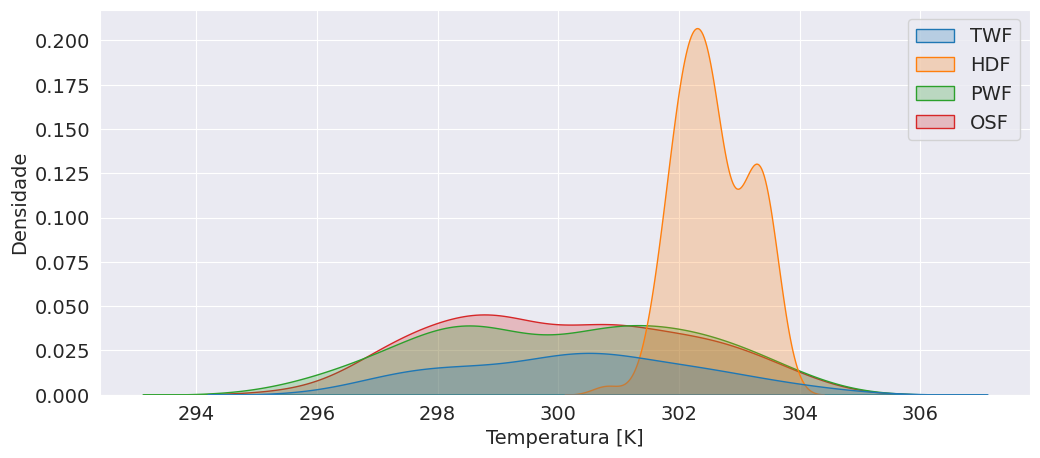

In [ ]:
sns.kdeplot(data = df_tempAr,fill=True)
plt.ylabel('Densidade')
plt.xlabel('Temperatura [K]')

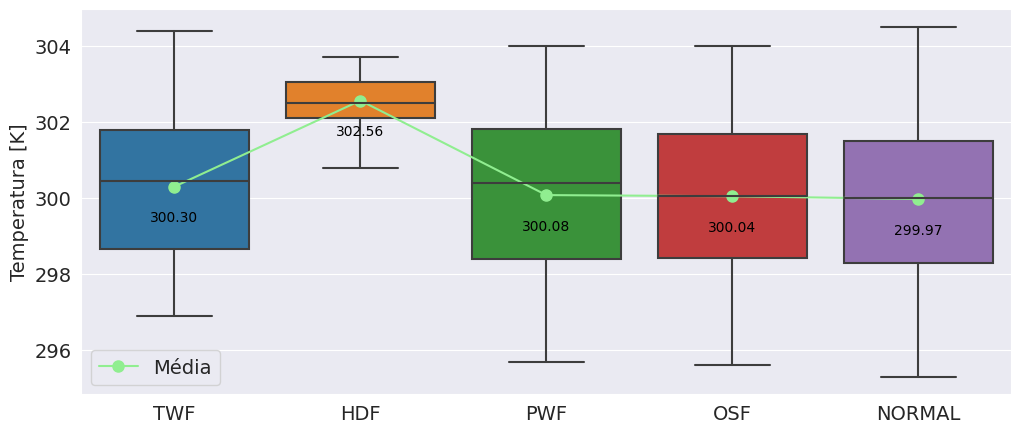

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas para o gráfico de boxplot
boxplot_data = df[['Air temperature [K](twf)','Air temperature [K](hdf)','Air temperature [K](pwf)','Air temperature [K](osf)','Air temperature [K](normal)']]
boxplot_data.columns = ['TWF','HDF','PWF','OSF','NORMAL']
# Calcular as médias das colunas
means = boxplot_data.mean()

# Criar o gráfico de boxplot
sns.boxplot(data=boxplot_data)

# Adicionar os pontos das médias
plt.plot(range(len(means)), means, marker='o', markersize=8, color='lightgreen', label='Média')

# Adicionar legenda com o valor da média
for i, mean in enumerate(means):
    plt.text(i, mean-1, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Adicionar legenda
plt.legend()
plt.ylabel('Temperatura [K]')
# Exibir o gráfico
plt.show()

## Temperatura do Processo

Text(0.5, 0, 'Temperatura [K]')

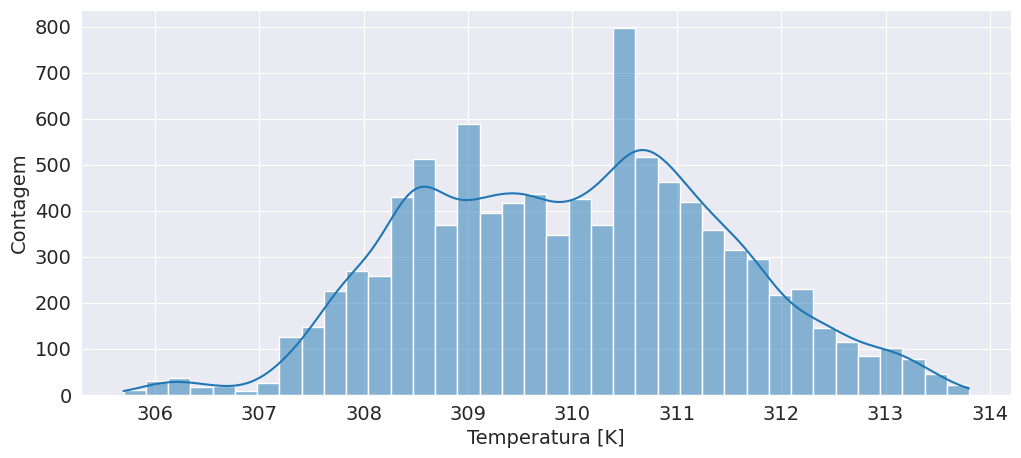

In [ ]:
# condição normal de funcionamento

sns.histplot(df['Process temperature [K](normal)'],kde=True)
plt.ylabel('Contagem')
plt.xlabel('Temperatura [K]')
#plt.title('Histograma da Temperatura do Processo para Classe Normal de Funcionamento')

In [ ]:
df_tempPro = df[['Process temperature [K](twf)','Process temperature [K](hdf)','Process temperature [K](pwf)','Process temperature [K](osf)']]
df_tempPro.columns = ['TWF','HDF','PWF','OSF']

Text(0.5, 1.0, 'Histograma da Temperatura do Processo para as Classes em Condição de Falha')

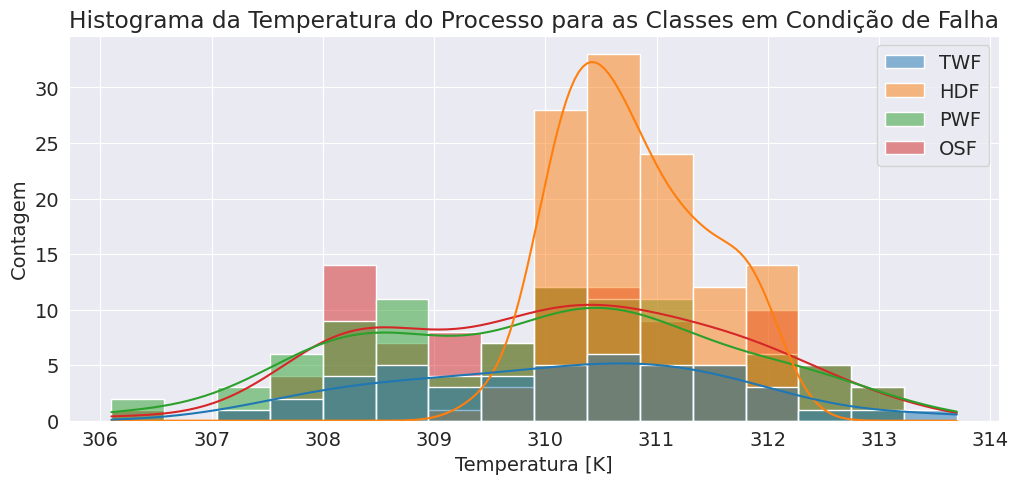

In [ ]:
sns.histplot(df_tempPro, kde=True)
plt.ylabel('Contagem')
plt.xlabel('Temperatura [K]')
plt.title('Histograma da Temperatura do Processo para as Classes em Condição de Falha')

Text(0.5, 0, 'Temperatura [K]')

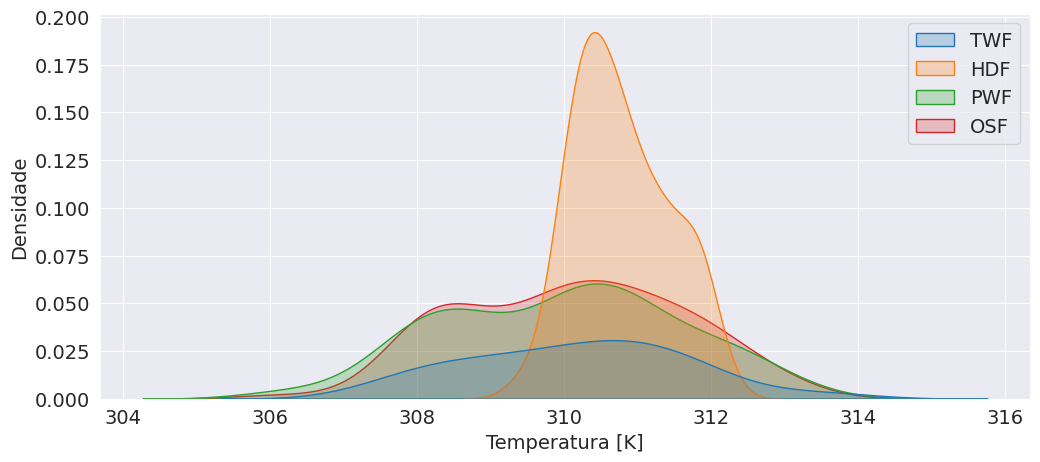

In [ ]:
sns.kdeplot(data = df_tempPro,fill=True)
plt.ylabel('Densidade')
plt.xlabel('Temperatura [K]')

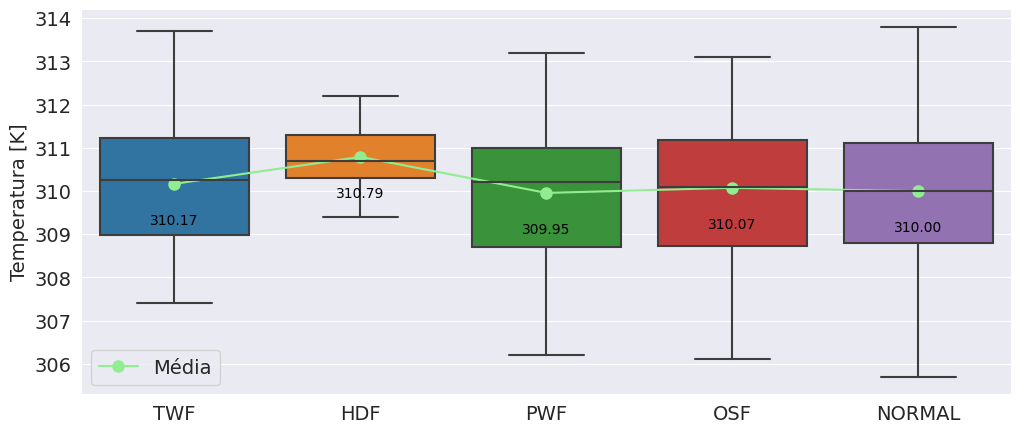

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas para o gráfico de boxplot
boxplot_data = df[['Process temperature [K](twf)','Process temperature [K](hdf)','Process temperature [K](pwf)',
                   'Process temperature [K](osf)','Process temperature [K](normal)']]
boxplot_data.columns = ['TWF','HDF','PWF','OSF','NORMAL']
# Calcular as médias das colunas
means = boxplot_data.mean()

# Criar o gráfico de boxplot
sns.boxplot(data=boxplot_data)

# Adicionar os pontos das médias
plt.plot(range(len(means)), means, marker='o', markersize=8, color='lightgreen', label='Média')

# Adicionar legenda com o valor da média
for i, mean in enumerate(means):
    plt.text(i, mean-1, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Adicionar legenda
plt.legend()
plt.ylabel('Temperatura [K]')
# Exibir o gráfico
plt.show()

Conclusão da analise: Um ambiente mais frio é ideal para presercar as maquinas!! Visto que a maioria das falhas são por causa de calor e problemas de dissipação

## Rotational Speed

Text(0.5, 0, 'Velocidade [rpm]')

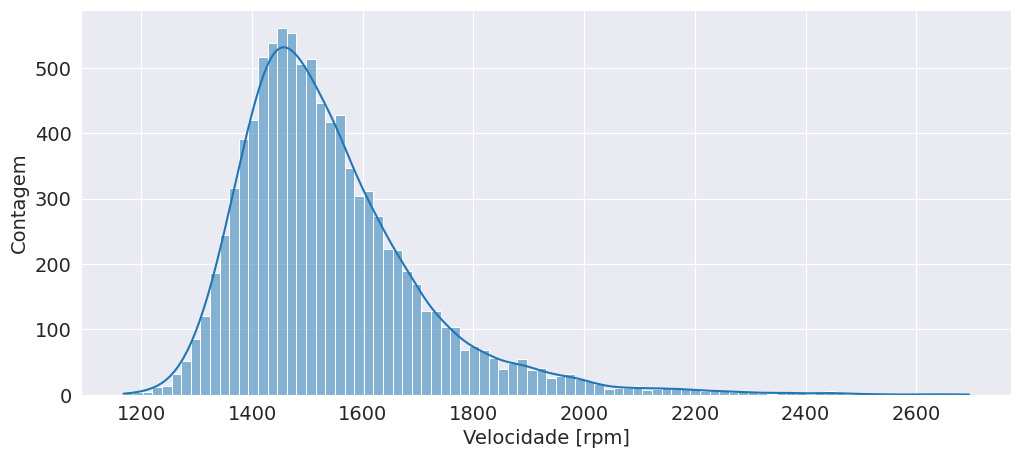

In [ ]:
# condição normal de funcionamento

sns.histplot(df['Rotational speed [rpm](normal)'],kde=True)
plt.ylabel('Contagem')
plt.xlabel('Velocidade [rpm]')
#plt.title('Histograma da Velocidade de Rotação do Motor para a Classe Normal de Funcionamento')

In [ ]:
df_vel = df[['Rotational speed [rpm](twf)','Rotational speed [rpm](hdf)','Rotational speed [rpm](pwf)','Rotational speed [rpm](osf)']]
df_vel.columns = ['TWF','HDF','PWF','OSF']

Text(0.5, 1.0, 'Histogramas da Velocidade de Rotação do Motor para as Classes em Condição de Falha')

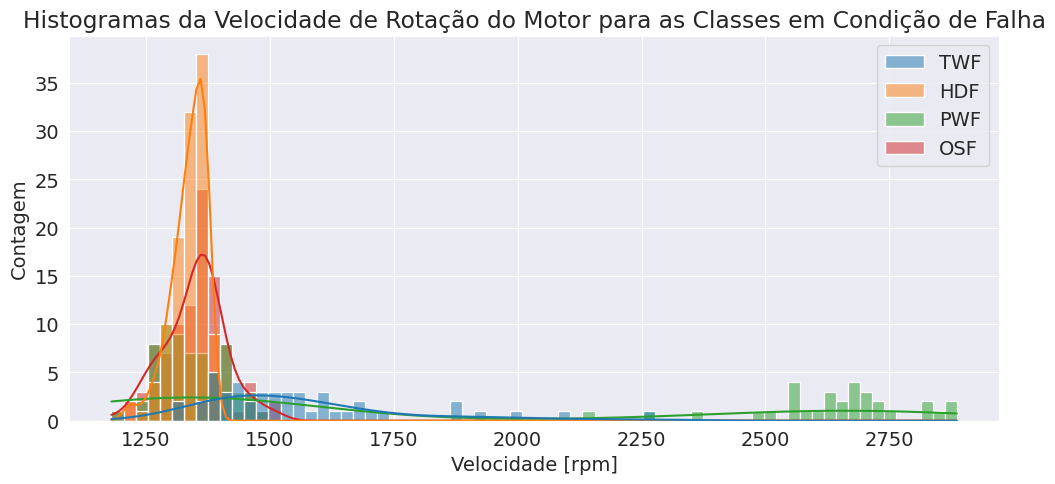

In [ ]:
sns.histplot(df_vel, kde=True)
plt.ylabel('Contagem')
plt.xlabel('Velocidade [rpm]')
plt.title('Histogramas da Velocidade de Rotação do Motor para as Classes em Condição de Falha')

Text(0.5, 0, 'Velocidade [rpm]')

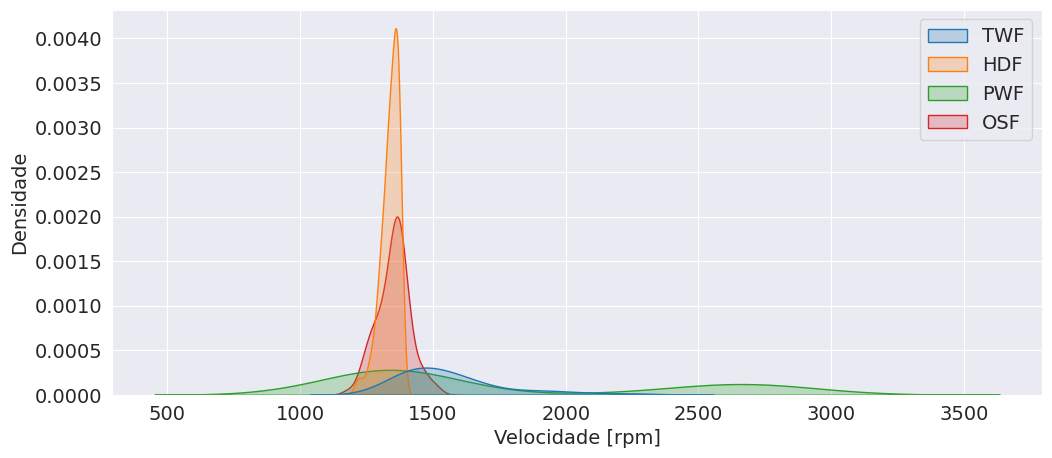

In [ ]:
sns.kdeplot(data = df_vel,fill=True)
plt.ylabel('Densidade')
plt.xlabel('Velocidade [rpm]')

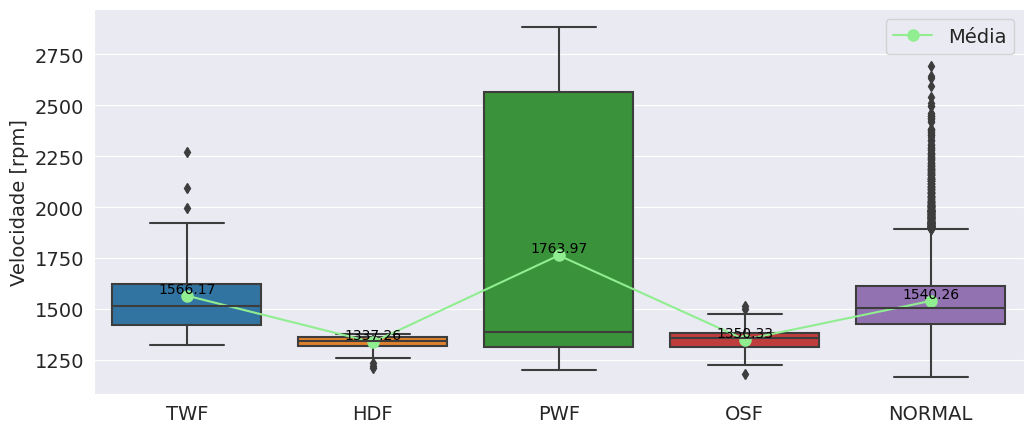

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas para o gráfico de boxplot
boxplot_data = df[['Rotational speed [rpm](twf)', 'Rotational speed [rpm](hdf)', 'Rotational speed [rpm](pwf)', 'Rotational speed [rpm](osf)','Rotational speed [rpm](normal)']]
boxplot_data.columns = ['TWF','HDF','PWF','OSF','NORMAL']
# Calcular as médias das colunas
means = boxplot_data.mean()

# Criar o gráfico de boxplot
sns.boxplot(data=boxplot_data)

# Adicionar os pontos das médias
plt.plot(range(len(means)), means, marker='o', markersize=8, color='lightgreen', label='Média')

# Adicionar legenda com o valor da média
for i, mean in enumerate(means):
    plt.text(i, mean-1, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Adicionar legenda
plt.legend()
plt.ylabel('Velocidade [rpm]')
# Exibir o gráfico
plt.show()

## Tool Wear

Text(0.5, 0, 'Tempo [min]')

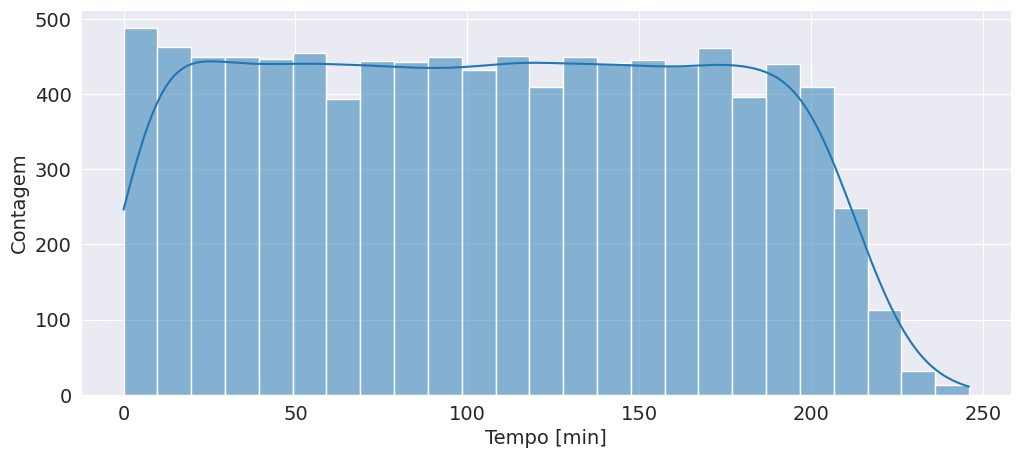

In [ ]:
# condição normal de funcionamento

sns.histplot(df['Tool wear [min](normal)'],kde=True)
plt.ylabel('Contagem')
plt.xlabel('Tempo [min]')
#plt.title('Histograma do Tempo de Desgaste da Ferramenta para Classe Normal de Funcionamento')

In [ ]:
df_des = df[['Tool wear [min](twf)','Tool wear [min](hdf)','Tool wear [min](pwf)','Tool wear [min](osf)']]
df_des.columns = ['TWF','HDF','PWF','OSF']

Text(0.5, 1.0, 'Histogramas do Tempo de Desgaste da Ferramenta para as Classes em Condição de Falha')

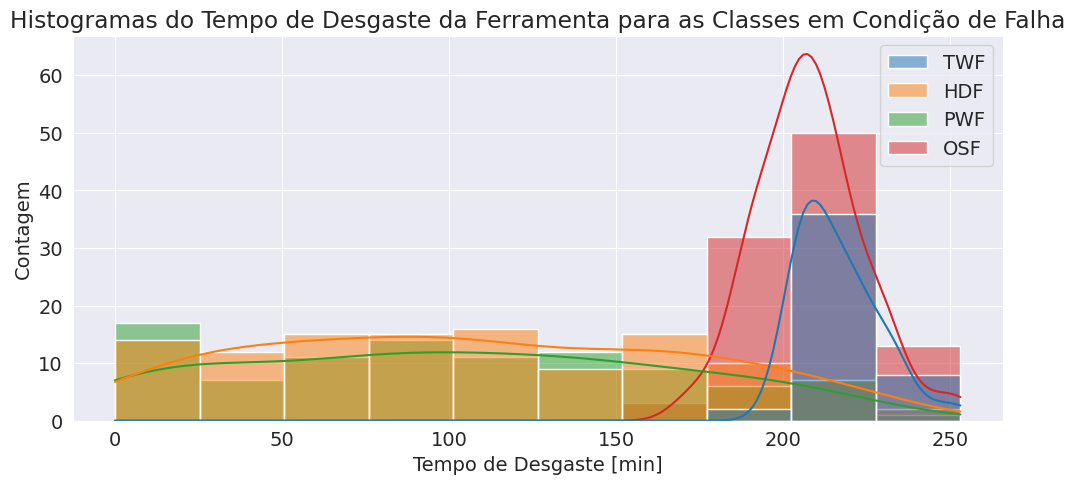

In [ ]:
sns.histplot(df_des, kde=True)
plt.ylabel('Contagem')
plt.xlabel('Tempo de Desgaste [min]')
plt.title('Histogramas do Tempo de Desgaste da Ferramenta para as Classes em Condição de Falha')

Text(0.5, 0, 'Tempo de Desgaste [min]')

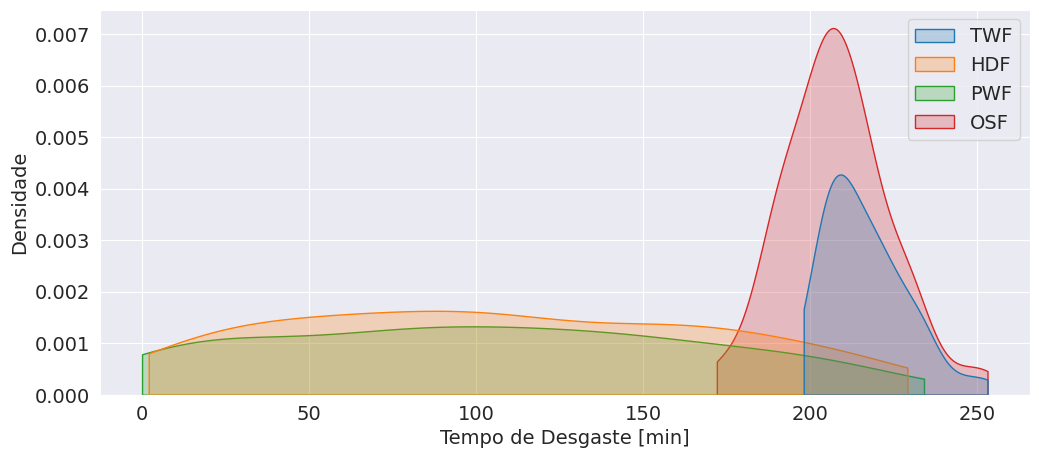

In [ ]:

sns.kdeplot(data=df_des,
            fill=True, cut=0)
df_des.columns = ['TWF','HDF','PWF','OSF']
plt.ylabel('Densidade')
plt.xlabel('Tempo de Desgaste [min]')

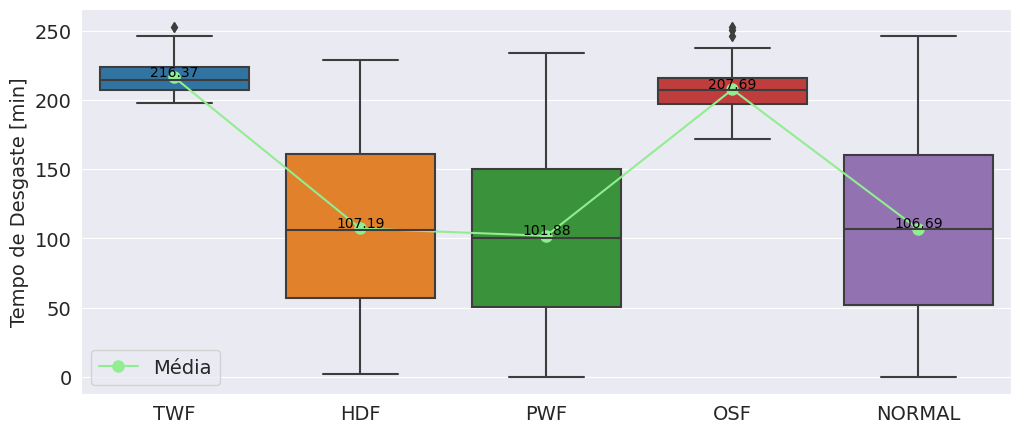

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas para o gráfico de boxplot
boxplot_data = df[['Tool wear [min](twf)','Tool wear [min](hdf)','Tool wear [min](pwf)','Tool wear [min](osf)',
                   'Tool wear [min](normal)']]
boxplot_data.columns = ['TWF','HDF','PWF','OSF','NORMAL']
# Calcular as médias das colunas
means = boxplot_data.mean()

# Criar o gráfico de boxplot
sns.boxplot(data=boxplot_data)

# Adicionar os pontos das médias
plt.plot(range(len(means)), means, marker='o', markersize=8, color='lightgreen', label='Média')

# Adicionar legenda com o valor da média
for i, mean in enumerate(means):
    plt.text(i, mean-1, f'{mean:.2f}', ha='center', va='bottom', color='black', fontsize=10)

# Adicionar legenda
plt.legend()
plt.ylabel('Tempo de Desgaste [min]')
# Exibir o gráfico
plt.show()